In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [2]:
from IPython.display import SVG
from IPython.display import display
%matplotlib inline

In [3]:
from IPython.display import HTML
style = "<style>svg{width:150% !important; height:150% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv("D://DataSC//Datasets//titanic//train.csv")
titanic_data_test = pd.read_csv("D://DataSC//Datasets//titanic//test.csv")
titanic_data_submit = pd.read_csv("D://DataSC//Datasets//titanic//gender_submission.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
X = titanic_data.drop(["PassengerId","Survived", "Name", "Ticket", "Cabin" ], axis=1)
X_1 = titanic_data_test.drop(["PassengerId", "Name", "Ticket", "Cabin" ], axis=1)
y = titanic_data.Survived

In [8]:
X_1.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [9]:
X = pd.get_dummies(X)
X_1 = pd.get_dummies(X_1)

In [10]:
X_1.shape

(418, 10)

In [11]:
X = X.fillna({ "Age" : X.Age.median()})
X_1 = X_1.fillna({ "Age" : X_1.Age.median(), "Fare":0})

In [12]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [16]:
type(y_train)

pandas.core.series.Series

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
clf.score(X_test, y_test)

0.7796610169491526

In [19]:
clf1 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=3)

In [20]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 190.26, 'Sex_male <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]\nclass = Negative'),
 Text(83.7, 135.9, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]\nclass = Positive'),
 Text(41.85, 81.53999999999999, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]\nclass = Positive'),
 Text(20.925, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Negative'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]\nclass = Positive'),
 Text(125.55000000000001, 81.53999999999999, 'Fare <= 23.35\nentropy = 0.996\nsamples = 99\nvalue = [53, 46]\nclass = Negative'),
 Text(104.625, 27.180000000000007, 'entropy = 0.991\nsamples = 81\nvalue = [36, 45]\nclass = Positive'),
 Text(146.475, 27.180000000000007, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]\nclass = Negative'),
 Text(251.10000000000002, 135.9, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]\nclass = Negative')

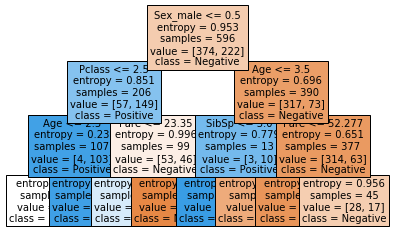

In [21]:
tree.plot_tree(clf1, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True, fontsize=10)

In [22]:
clf1.score(X_test, y_test)

0.8203389830508474

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=4)

In [25]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [26]:
cross_val_scores_data = pd.DataFrame()
max_depth_values = range(1,100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

In [27]:
cross_val_scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.803664


In [28]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=["max_depth"]
                                    , value_vars=["train_score", "test_score", "cross_val_score"]
                                    , var_name="set_type", value_name="score")

In [29]:
cross_val_scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


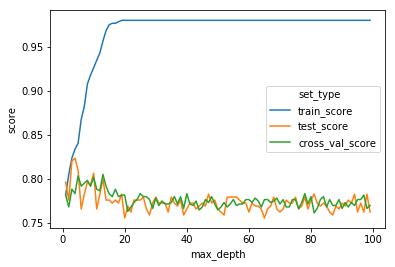

In [30]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)

In [31]:
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)

In [32]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7830508474576272

In [33]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
best_clf.score(X_train, y_train)

0.9261744966442953

In [35]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf = tree.DecisionTreeClassifier()

In [62]:
param = {"criterion" : ["gini","entropy"], 'min_samples_split':[50,100], 'min_samples_leaf':[5,10]}

In [63]:
GridSearchCV_clf = GridSearchCV(clf, param, cv=5)

In [64]:
GridSearchCV_clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10],
                       

In [65]:
GridSearchCV_clf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 100}

In [66]:
best_clf = GridSearchCV_clf.best_estimator_

In [67]:
y_pred = best_clf.predict(X_test)

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_test, y_pred)

0.8468468468468469

In [70]:
recall_score(y_test, y_pred)

0.7833333333333333

In [71]:
y_predicted_prob = best_clf.predict_proba(X_test)

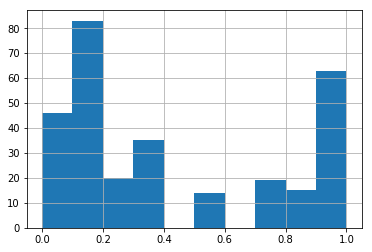

In [72]:
pd.Series(y_predicted_prob[:,1]).hist()

In [80]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1 , 0)

In [81]:
precision_score(y_test, y_pred)

0.9102564102564102

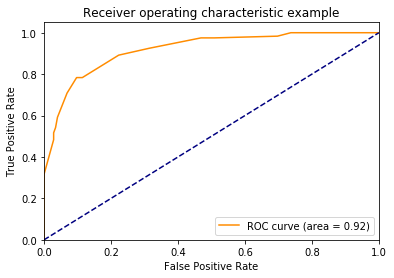

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [83]:
prediction = best_clf.predict(X_1)

In [84]:
y_predicted_prob1 = best_clf.predict_proba(X_1)

In [90]:
prediction = np.where(y_predicted_prob1[:,1] > 0.5, 1 , 0)

In [93]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
best_clf.score(X_1, prediction)

1.0

In [92]:
answer = titanic_data_submit.drop("Survived", axis=1)

In [94]:
answer["Survived"] = prediction

In [95]:
answer.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
answer.to_csv(("D://DataSC//Datasets//titanic//submission1.csv"), index=False)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf_rf = RandomForestClassifier()

In [98]:
params = {"n_estimators":[10,20,30], "max_depth":[2,4,7,10]}

In [100]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)

In [101]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [102]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [103]:
prediction_2 = grid_search_cv_clf.best_estimator_.predict(X_1)

In [104]:
answer = titanic_data_submit.drop("Survived", axis=1)
answer["Survived"] = prediction

In [105]:
answer.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [106]:
answer.to_csv(("D://DataSC//Datasets//titanic//submission1.csv"), index=False)